<a href="https://colab.research.google.com/github/Pranayshukla0610/ML-projects-portfolio/blob/main/XGBOOST_Regressor_on_New_York_Airbnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/new_york_listings_2024.csv.zip')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [5]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [6]:
df.drop(['id','name','host_name','last_review'],axis=1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,7130382,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,3,0.03,1,0,0,No License,5.0,1,1,Not specified
1,51501835,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,9,0.24,139,364,2,No License,4.67,2,1,1
2,528871354,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,6,1.67,1,343,6,Exempt,4.17,1,2,1
3,19902271,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,156,1.38,2,363,12,No License,4.64,1,1,1
4,61391963,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,11,0.24,133,335,3,No License,4.91,Studio,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,186680487,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,30,124,1.81,1,157,12,No License,4.75,1,1,1
20754,3237504,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30,56,0.48,1,0,1,No License,4.46,1,2,1
20755,304317395,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30,60,2.09,1,0,27,No License,4.93,1,1,1
20756,163083101,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,30,7,0.91,1,363,7,No License,5.0,1,1,1


In [7]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


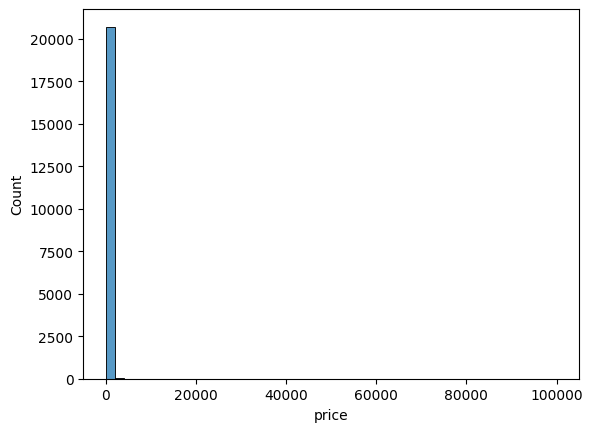

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['price'],bins=50)
plt.show()

In [10]:
df['log_price'] = np.log1p(df['price'])

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,log_price
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1,0,0,No License,5.0,1,1,Not specified,4.025352
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139,364,2,No License,4.67,2,1,1,4.976734
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1,343,6,Exempt,4.17,1,2,1,5.236442
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2,363,12,No License,4.64,1,1,1,4.795791
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133,335,3,No License,4.91,Studio,1,1,4.454347


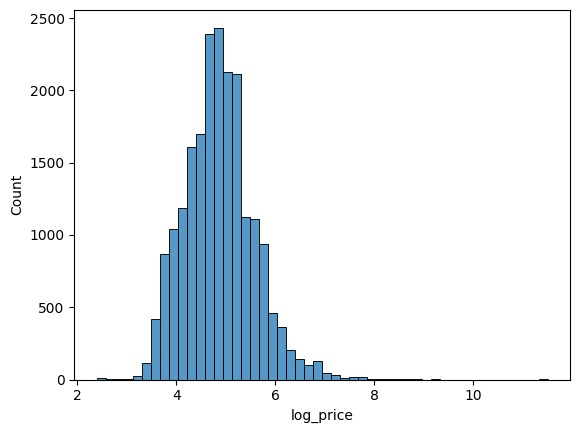

In [12]:
sns.histplot(df['log_price'],bins=50)
plt.show()

In [13]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df['price'] > Q1 - 1.5 * IQR) &
        (df['price'] < Q3 + 1.5 * IQR)]

In [14]:
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Brooklyn,7319
Manhattan,7162
Queens,3672
Bronx,934
Staten Island,286


In [15]:
df = pd.get_dummies(df, columns=['neighbourhood_group','room_type'],drop_first=True)

In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,beds,baths,log_price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Clinton Hill,40.683710,-73.964610,55.0,30,3,...,1,Not specified,4.025352,True,False,False,False,False,True,False
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Hell's Kitchen,40.766610,-73.988100,144.0,30,9,...,1,1,4.976734,False,True,False,False,False,False,False
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Chelsea,40.750764,-73.994605,187.0,2,6,...,2,1,5.236442,False,True,False,False,False,False,False
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Washington Heights,40.835600,-73.942500,120.0,30,156,...,1,1,4.795791,False,True,False,False,False,True,False
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Murray Hill,40.751120,-73.978600,85.0,30,11,...,1,1,4.454347,False,True,False,False,False,False,False


In [18]:
df['price_per_day_available'] = df['price']/(df['availability_365']+1)

In [19]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,baths,log_price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,price_per_day_available
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Clinton Hill,40.683710,-73.964610,55.0,30,3,...,Not specified,4.025352,True,False,False,False,False,True,False,55.000000
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Hell's Kitchen,40.766610,-73.988100,144.0,30,9,...,1,4.976734,False,True,False,False,False,False,False,0.394521
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Chelsea,40.750764,-73.994605,187.0,2,6,...,1,5.236442,False,True,False,False,False,False,False,0.543605
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Washington Heights,40.835600,-73.942500,120.0,30,156,...,1,4.795791,False,True,False,False,False,True,False,0.329670
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Murray Hill,40.751120,-73.978600,85.0,30,11,...,1,4.454347,False,True,False,False,False,False,False,0.252976


In [20]:
df['host_density'] = df['calculated_host_listings_count']/(df['minimum_nights']+1)

In [21]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,log_price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,price_per_day_available,host_density
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Clinton Hill,40.683710,-73.964610,55.0,30,3,...,4.025352,True,False,False,False,False,True,False,55.000000,0.032258
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Hell's Kitchen,40.766610,-73.988100,144.0,30,9,...,4.976734,False,True,False,False,False,False,False,0.394521,4.483871
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Chelsea,40.750764,-73.994605,187.0,2,6,...,5.236442,False,True,False,False,False,False,False,0.543605,0.333333
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Washington Heights,40.835600,-73.942500,120.0,30,156,...,4.795791,False,True,False,False,False,True,False,0.329670,0.064516
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Murray Hill,40.751120,-73.978600,85.0,30,11,...,4.454347,False,True,False,False,False,False,False,0.252976,4.290323


In [22]:
df['review_availability_interaction'] = df['number_of_reviews'] * df['availability_365']

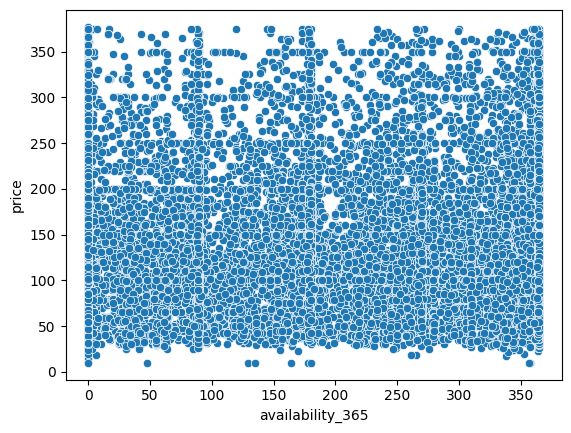

In [23]:
sns.scatterplot(x='availability_365', y='price',data=df)
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19373 entries, 0 to 20757
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 19373 non-null  int64  
 1   name                               19373 non-null  object 
 2   host_id                            19373 non-null  int64  
 3   host_name                          19373 non-null  object 
 4   neighbourhood                      19373 non-null  object 
 5   latitude                           19373 non-null  float64
 6   longitude                          19373 non-null  float64
 7   price                              19373 non-null  float64
 8   minimum_nights                     19373 non-null  int64  
 9   number_of_reviews                  19373 non-null  int64  
 10  last_review                        19373 non-null  object 
 11  reviews_per_month                  19373 non-null  float64


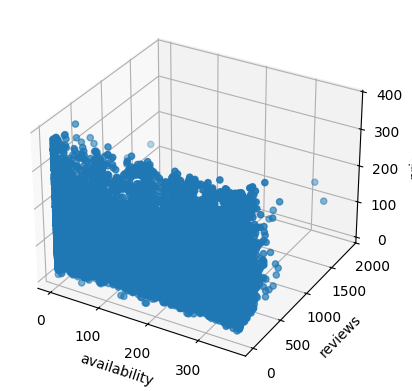

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['availability_365'],df['number_of_reviews'],df['price'])

ax.set_xlabel('availability')
ax.set_ylabel('reviews')
ax.set_zlabel('price')

plt.show()

In [29]:
X = df.drop(["price", "log_price"], axis=1)
y = df["log_price"]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [34]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    enable_categorical=True
)

model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [36]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2_score = r2_score(y_test, y_pred)

print('RMSE',rmse)
print('mse',mse)
print('r2_score',r2_score)

RMSE 0.1712035819839254
mse 0.029310666484126672
r2_score 0.9092753824722204
